# Capstone 2 - Baseball Stat Projections - Pre-Processing

In [277]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
import statsmodels.api as sm 
import statsmodels.regression as smr

In [278]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data"
os.chdir(path)
df = pd.read_csv('Baseball_DW.csv', index_col=0)
df.head()

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,iso_2,ops_3,ops_vs_lg_avg_3,ops_vs_season_avg_3,avg_3,bb%_3,k%_3,XBA%_3,hr%_3,iso_3
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0.213115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
# Remove current season counting stats to avoid unrealistic dataset
df = df.drop(['obp', 'slg', 'ops_vs_lg_avg', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', \
               'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp', 'ops_vs_season_avg', \
             'avg', 'bb%', 'k%', 'XBA%', 'hr%', 'iso', 'g_c','g_1b','g_2b','g_3b','g_ss', \
              'g_of','g_dh'], axis=1)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12361 entries, 0 to 12360
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            12361 non-null  object 
 1   year                 12361 non-null  int64  
 2   salary               12361 non-null  int64  
 3   season               12361 non-null  int64  
 4   age                  12361 non-null  int64  
 5   ops                  12361 non-null  float64
 6   ops_lg               12361 non-null  float64
 7   season_ops           12361 non-null  float64
 8   ops_1                12361 non-null  float64
 9   ops_vs_lg_avg_1      12361 non-null  float64
 10  ops_vs_season_avg_1  12361 non-null  float64
 11  avg_1                12361 non-null  float64
 12  bb%_1                12361 non-null  float64
 13  k%_1                 12361 non-null  float64
 14  XBA%_1               12361 non-null  float64
 15  hr%_1                12361 non-null 

In [280]:
# encode categorical features with dummy variables

#dfo = pd.DataFrame(df['short_prev_season'])
#df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
#df

In [281]:
# Break out response variable and scale data

X = df.drop(['player_id', 'ops'], axis=1)

y = df.ops

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)

print(X.head())
print(X_scaled)


   year  salary  season  age    ops_lg  season_ops     ops_1  ops_vs_lg_avg_1  \
0  1998  175000       1   26  0.755338    0.700753  0.000000         0.000000   
1  1999  255000       2   27  0.778393    0.711484  0.796151         0.040813   
2  2000  255000       3   28  0.782061    0.726564  0.488964        -0.289429   
3  1993  109000       0   24  0.735573    0.679199  0.000000         0.000000   
4  1994  109000       1   25  0.763021    0.700753  0.691086        -0.044487   

   ops_vs_season_avg_1     avg_1  ...     iso_2  ops_3  ops_vs_lg_avg_3  \
0             0.000000  0.000000  ...  0.000000    0.0              0.0   
1             0.095398  0.278689  ...  0.000000    0.0              0.0   
2            -0.222520  0.157895  ...  0.213115    0.0              0.0   
3             0.000000  0.000000  ...  0.000000    0.0              0.0   
4             0.011887  0.245902  ...  0.000000    0.0              0.0   

   ops_vs_season_avg_3  avg_3  bb%_3  k%_3  XBA%_3  hr%_3  iso

In [282]:
# Split data into training and test splits

y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=34)

print('max y_train: ' + str(y_train.max()))
print('min y_train: ' + str(y_train.min()))
print('diff: ' + str(y_train.max() - y_train.min()))
print('max X_train: ' + str(X_train.max()))
print('min X_train: ' + str(X_train.min()))
print('diff: ' + str(X_train.max() - X_train.min()))
print('')
print('max y_test: ' + str(y_test.max()))
print('min y_test: ' + str(y_test.min()))
print('diff: ' + str(y_test.max() - y_test.min()))
print('max X_test: ' + str(X_test.max()))
print('min X_test: ' + str(X_test.min()))
print('diff: ' + str(X_test.max() - X_test.min()))

# Deleting outlier OPS value
#X_test = np.delete(X_test, np.argmax(y_test), axis=0)
#y_test = np.delete(y_test, np.argmax(y_test), axis=0)

max y_train: 1.3826140015457835
min y_train: 0.16344086021505375
diff: 1.2191731413307298
max X_train: 9.11427627529803
min X_train: -7.308704023301276
diff: 16.422980298599306

max y_test: 1.4247102898411508
min y_test: 0.19538461538461535
diff: 1.2293256744565355
max X_test: 8.930303977381758
min X_test: -6.237687268796343
diff: 15.1679912461781


# Capstone 2 - Baseball Stat Projections - Modeling

# Model 1:

In [283]:
'''# Cross Validation

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

r2_scores = []

def cv_score(clf, x, y, score_func=r2_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
        r2 = score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
        r2_scores.append(r2)
    return result / nfold # average

clf = LinearRegression()
score = cv_score(clf, X_train, y_train)
print('cross validation score:', score)
print(r2_scores)'''

"# Cross Validation\n\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import accuracy_score\n\nr2_scores = []\n\ndef cv_score(clf, x, y, score_func=r2_score):\n    result = 0\n    nfold = 5\n    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times\n        clf.fit(x[train], y[train]) # fit\n        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data\n        r2 = score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data\n        r2_scores.append(r2)\n    return result / nfold # average\n\nclf = LinearRegression()\nscore = cv_score(clf, X_train, y_train)\nprint('cross validation score:', score)\nprint(r2_scores)"

In [284]:
# Model 1 - Linear Regression
lin_reg = LinearRegression()
model_1 = lin_reg.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:',r2)
print('Mean Absolute Error:',mae)
print('Intercept:', abs(model_1.intercept_))
print(pd.DataFrame(abs(lin_reg.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False).head(10))


R-squared: 0.35505825746324193
Mean Absolute Error: 0.07519027310711203
Intercept: 0.7281178609824388
       Coefficient
ops_2     0.199000
ops_1     0.138195
avg_2     0.131153
avg_1     0.117316
ops_3     0.117173
iso_2     0.079251
avg_3     0.072613
iso_3     0.067820
age       0.029566
bb%_2     0.029264


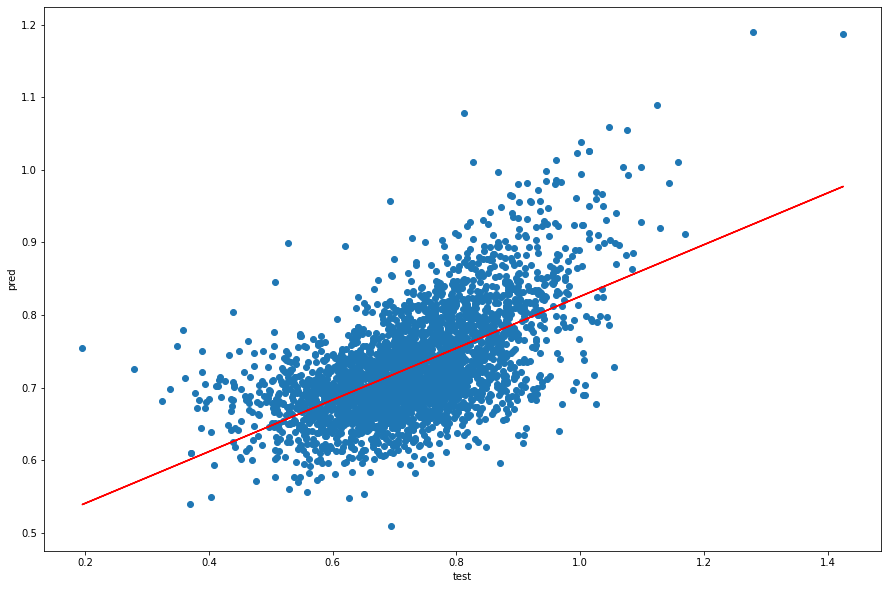

In [289]:
# Model 1 visual
_ = plt.scatter(y_test, y_pred)
_ = plt.rcParams["figure.figsize"] = (5,3)
m, p = np.polyfit(y_test, y_pred, 1)
_ = plt.plot(y_test, m*y_test + p, color='red')
_ = plt.xlabel('test')
_ = plt.ylabel('pred')
_ = plt.show()

# Model 2:

In [290]:
# Hyperparameter tuning - Random Search

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import time
start_time = time.time()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators':n_estimators,
             'max_depth':max_depth,
             'max_features':max_features,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

end_time = time.time()
print('Run time:',end_time - start_time, 'seconds')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 92.0min finished


Run time: 5589.476526260376 seconds


In [293]:
print(rf_random.best_params_)

{'n_estimators': 727, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [291]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

rfr_base = RandomForestRegressor(n_estimators=100, random_state=34)
rfr_base.fit(X_train, y_train)
base_accuracy = evaluate(rfr_base, X_test, y_test)



Model Performance
Average Error: 0.0782 degrees.
Accuracy = 88.46%.


In [294]:
rfr_rand = rf_random.best_estimator_
rfr_rand.fit(X_train, y_train)
rand_accuracy = evaluate(rfr_rand, X_test, y_test)
diff = rand_accuracy - base_accuracy
print('Accuracy gain:', diff)


Model Performance
Average Error: 0.0763 degrees.
Accuracy = 88.72%.
Accuracy gain: 0.0031583770866490113


In [ ]:
#Hyperparameter tuning - GridSearch

In [295]:
# Model 2 - Random Forest Regression

import time
start_time = time.time()

rfr = RandomForestRegressor(n_estimators=727, min_samples_split=5, min_samples_leaf=4, 
                            max_features='auto', max_depth=10, bootstrap=True, random_state=34)
model2 = rfr.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)

print('R-squared:',r2)
print('Mean Absolute Error:',mae)

end_time = time.time()
print('Run time:',end_time - start_time, 'seconds')

R-squared: 0.34554931917754106
Mean Absolute Error: 0.07621558372741544
Run time: 75.33064913749695 seconds


40


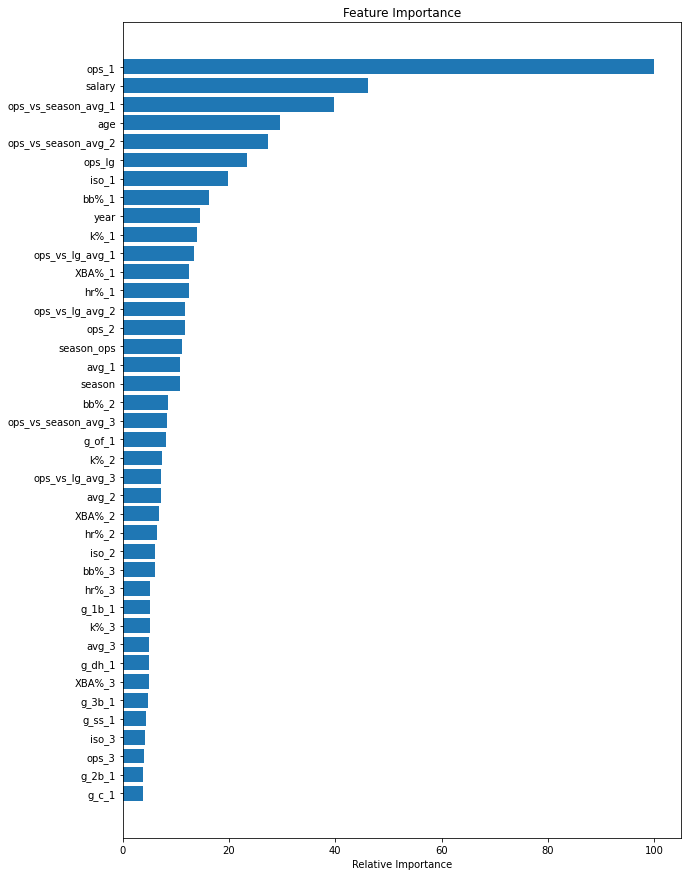

In [287]:
feature_importance = model2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

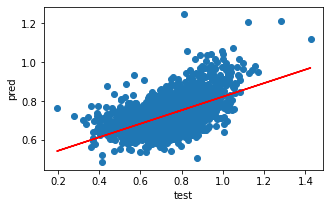

In [288]:
# Model 2 visual
_2 = plt.scatter(y_test, y_pred2)
_2 = plt.rcParams["figure.figsize"] = (15,10)
m2, p2 = np.polyfit(y_test, y_pred2, 1)
_2 = plt.plot(y_test, m2*y_test + p2, color='red')
_2 = plt.xlabel('test')
_2 = plt.ylabel('pred')
_2 = plt.show()

# Model 3:

In [216]:
# Model 3 - Run model with fewer, more important features

col_list = ['ops_1', 'ops_2', 'ops_vs_season_avg_1', 'ops_vs_season_avg_2', 'ops_vs_lg_avg_1', \
         'ops_vs_lg_avg_2', 'salary', 'age', 'year', 'season', 'ab_1', 'h_1', 'double_1', 'triple_1', 'hr_1', \
            'rbi_1', 'g_c', 'g_1b', 'g_2b', 'g_3b', 'g_ss', 'g_of','g_dh']#, 'wOBA_1', 'wOBA_2']

X3 = df[col_list]

y3 = df.ops

scaler3 = StandardScaler().fit(X3)

X_scaled3 = scaler3.transform(X3)

In [217]:
# Model 3 - split data into training and test sets

y3 = y3.ravel()

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled3, y3, test_size=0.25, random_state=34)

In [218]:
# Model 3

start_time = time.time()

rfr = RandomForestRegressor(n_estimators=100, random_state=34)
model3 = rfr.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

# Evaluation Metrics
r2_3 = r2_score(y_test3, y_pred3)
mae3 = mean_absolute_error(y_test3, y_pred3)

print('R-squared:',r2_3)
print('Mean Absolute Error:',mae3)

end_time = time.time()
print('Run time:',end_time - start_time, 'seconds')

R-squared: 0.43047352272802086
Mean Absolute Error: 0.07144465709234517
Run time: 21.853559017181396 seconds


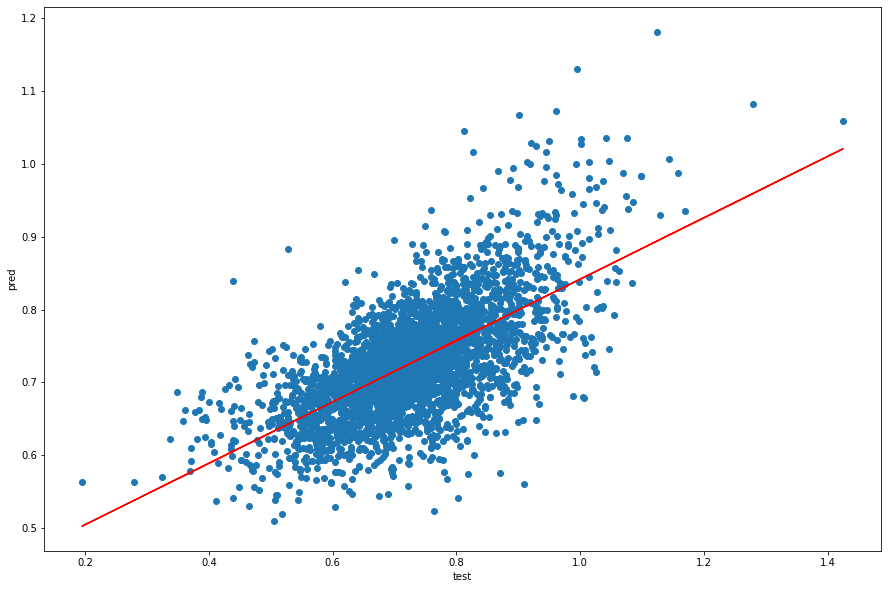

In [219]:
# Model 3 visual
_3 = plt.scatter(y_test3, y_pred3)
_3 = plt.rcParams["figure.figsize"] = (15,10)
m3, p3 = np.polyfit(y_test3, y_pred3, 1)
_3 = plt.plot(y_test, m2*y_test + p2, color='red')
_3 = plt.xlabel('test')
_3 = plt.ylabel('pred')
_3 = plt.show()

# Model 4:

In [185]:
# Model 4 - split data set so my training set is everything up to 2015 and I am trying to predict 2015 OPS

X2_train = df[df['year'] < 2012]
X2_train = X2_train.drop(['player_id', 'ops'], axis=1)
y2_train = df[df['year'] < 2012]
y2_train = y2_train.ops

X2_test = df[df['year'] >= 2012]
X2_test = X2_test.drop(['player_id', 'ops'], axis=1)
y2_test = df[df['year'] >= 2012]
y2_test = y2_test.ops



In [186]:
# Model 4 - Random Forest Regression with train-test split based on years - real world prediction simulation

start_time = time.time()

rfr = RandomForestRegressor(n_estimators=100, random_state=34)
model4 = rfr.fit(X2_train, y2_train)
y_pred4 = model4.predict(X2_test)

# Evaluation Metrics
r2 = r2_score(y2_test, y_pred4)
mae = mean_absolute_error(y2_test, y_pred4)

print('R-squared:',r2)
print('Mean Absolute Error:',mae)

end_time = time.time()
print('Run time:',end_time - start_time, 'seconds')



R-squared: 0.39318984385385425
Mean Absolute Error: 0.06936020226785256
Run time: 63.97511315345764 seconds


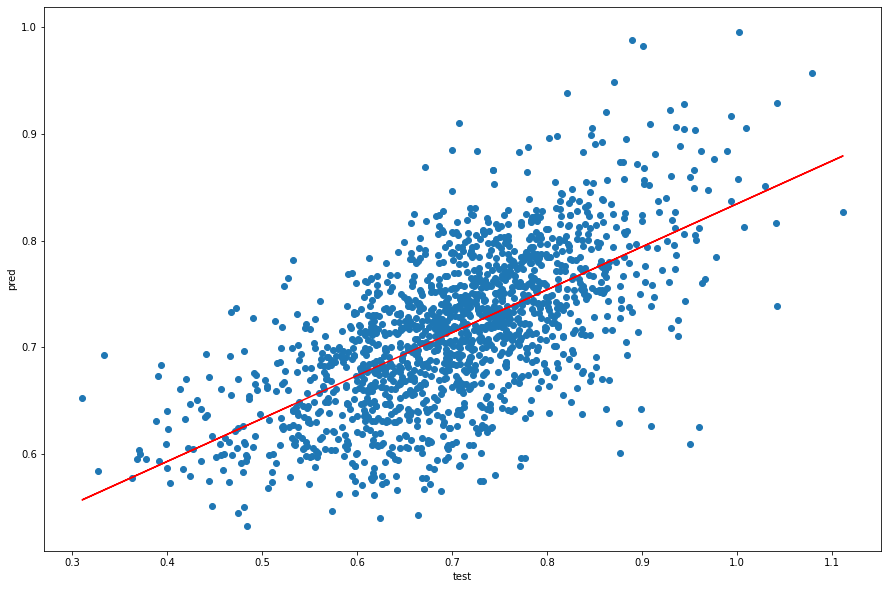

In [187]:
# Model 4 visual
_4 = plt.scatter(y2_test, y_pred4)
_4 = plt.rcParams["figure.figsize"] = (15,10)
m4, p4 = np.polyfit(y2_test, y_pred4, 1)
_4 = plt.plot(y2_test, m4*y2_test + p4, color='red')
_4 = plt.xlabel('test')
_4 = plt.ylabel('pred')
_4 = plt.show()

59


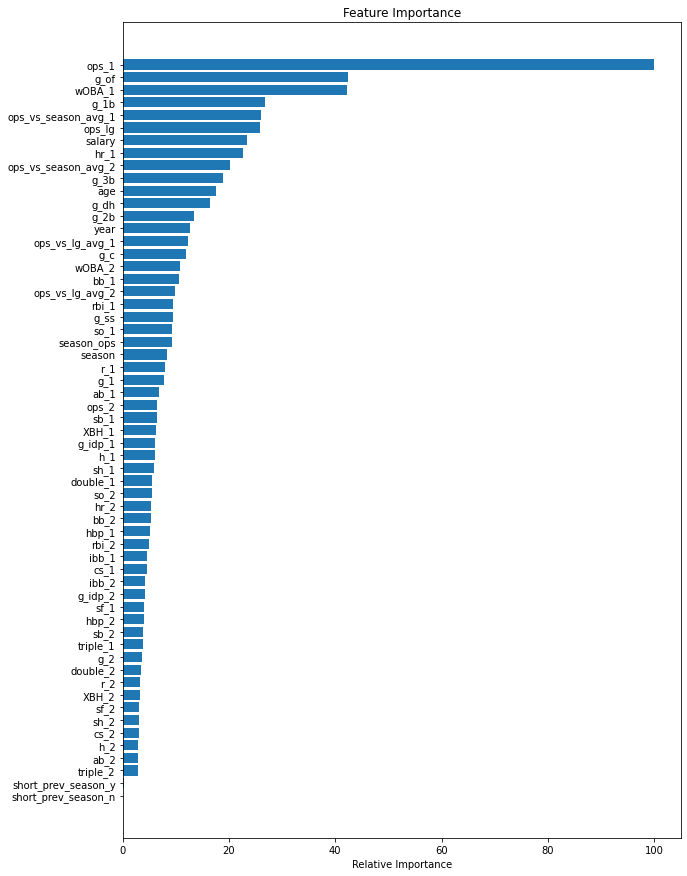

In [188]:
feature_importance4 = model4.feature_importances_
# make importances relative to max importance
feature_importance4 = 100.0 * (feature_importance4 / feature_importance4.max())
sorted_idx4 = np.argsort(feature_importance4)

pos4 = np.arange(sorted_idx4.shape[0]) + .5
print(pos4.size)
sorted_idx4.size
plt.figure(figsize=(10,15))
plt.barh(pos4, feature_importance4[sorted_idx4], align='center')
plt.yticks(pos4, X.columns[sorted_idx4])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [189]:
'''# Hyperparameter tuning

est = [1, 10, 50, 100]

for i in est:
    rfr = RandomForestRegressor(n_estimators=i, random_state=34)
    modeli = rfr.fit(X2_train, y2_train)
    y_predi = modeli.predict(X2_test)

    # Evaluation Metrics
    r2 = r2_score(y2_test, y_predi)
    mae = mean_absolute_error(y2_test, y_predi)

    print('R-squared with', i, 'estimators:',r2)
    print('Mean Absolute Error with', i, 'estimators:',mae)
'''

"# Hyperparameter tuning\n\nest = [1, 10, 50, 100]\n\nfor i in est:\n    rfr = RandomForestRegressor(n_estimators=i, random_state=34)\n    modeli = rfr.fit(X2_train, y2_train)\n    y_predi = modeli.predict(X2_test)\n\n    # Evaluation Metrics\n    r2 = r2_score(y2_test, y_predi)\n    mae = mean_absolute_error(y2_test, y_predi)\n\n    print('R-squared with', i, 'estimators:',r2)\n    print('Mean Absolute Error with', i, 'estimators:',mae)\n"